In [1]:
import pandas as pd
import numpy as np

In [2]:
#fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\01Nov2019_GenderizedData.csv'
fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-04-2019.csv'

data = pd.read_csv(fileLocation)

In [3]:
data.director_ids.nunique()

133100

In [4]:
# Extracting the year from release date column and movie column since the date published was not accurate

data['release_year'] = data.release_date.str.extract('(\d{4})', expand=False).str.strip()
data['movie_year'] = data.title.str.extract("\([^\d]*(\d{4})[^\d]*\)", expand=False).str.strip()

In [5]:
# Fill missing values in release year with that of movie year
data.loc[data['release_year'].isna(),'release_year'] = data['movie_year']
data.loc[data['release_year'].isna(),'release_year'] = data['year']

In [6]:
#data.release_year.value_counts(dropna = False)

In [7]:
data.release_year = data.release_year.astype(int)

In [8]:
# Sort by release year to find the first release year of each director
sorted_df = data.sort_values(by='release_year')
sorted_df2 = sorted_df.drop_duplicates(subset= 'director_ids',keep='first')


In [9]:
# Sort by release year to find the last release year of each director
sorted_df_last_active_year = sorted_df.drop_duplicates(subset= 'director_ids',keep='last')



In [10]:
sorted_df_last_active_year.head()

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,release_year,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year
220948,2006-01-01,nm1729707,tt0444211,"Johannes Passion, BWV. 245 (1725 Version) (Vid...",1,None,None,8.3,6,None,1725,Arjen Terpstra,\N,\N,"producer,director","tt1270262,tt1484981,tt0444211,tt0381190",2006,1,Male,1725
557687,2013-11-12,nm6027351,tt3274100,Pferd und Reiter Springen über ein Hindernis (...,1,None,None,6.0,84,None,1888,Ottomar Anschütz,1846,1907,"director,cinematographer",tt3274100,2013,11,Male,1888
203944,1888-10-14,nm1284117,tt0392728,Roundhay-i kerti jelenet (1888) - IMDb,39,7,None,7.6,4072,14 October 1888 (UK) See more »,1888,Louis Aimé Augustin Le Prince,1842,1890,"director,cinematographer,editor","tt0392728,tt0343112,tt1758563,tt2075247",1888,10,Male,1888
397743,2015-08-14,nm2954641,tt1202028,A londoni Trafalgar tér (1890) - IMDb,2,2,None,5.6,457,None,1890,Wordsworth Donisthorpe,1847,1914,"director,cinematographer",tt1202028,2015,8,Male,1890
397742,2015-08-14,nm2955286,tt1202028,A londoni Trafalgar tér (1890) - IMDb,2,2,None,5.6,457,None,1890,William Carr Crofts,1846,1894,"director,cinematographer",tt1202028,2015,8,Male,1890


In [11]:
LastYear_column = sorted_df_last_active_year.rename(columns={'release_year':'LastMovieYear'})
Last_year = LastYear_column[['LastMovieYear','director_ids']]



In [12]:
sorted_df3 = sorted_df2[['release_year','director_ids']]

In [13]:
# Get first movie release year of each director
First_year = sorted_df3.rename(columns={'release_year':'FirstMovieYear'})


In [14]:
merged_with_firstYear = data.merge(First_year, on='director_ids')
merged_with_first_and_last = merged_with_firstYear.merge(Last_year, on='director_ids')


In [15]:
#merged_with_first_and_last.to_csv('LastYear.csv')

In [16]:

merged_with_first_and_last.head()


,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,LastMovieYear
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,2011
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,2011
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,2011
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,2011
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,2011


In [17]:
merged_with_first_and_last["Career_Year_Number"] = merged_with_first_and_last.release_year - merged_with_first_and_last.FirstMovieYear + 1

In [18]:
merged_with_first_and_last['Career_Length'] = merged_with_first_and_last.LastMovieYear - merged_with_first_and_last.FirstMovieYear + 1

In [19]:
merged_with_first_and_last.Career_Length.value_counts()

1      81724
15     15315
13     14473
14     14407
9      14376
10     14332
11     13887
5      13760
7      13738
3      13582
12     13494
27     13414
8      13396
4      13360
21     13309
17     13302
24     13283
6      13059
23     12594
18     12484
19     12289
16     12270
33     12250
2      11952
25     11854
30     11814
20     11444
31     11126
22     11113
32     10923
       ...  
75       202
69       155
88       147
81       114
74       102
79       100
90        85
73        84
70        84
95        81
117       80
83        74
107       74
122       72
84        70
114       70
86        64
85        42
77        40
89        31
71        28
93        23
97        23
91        22
112       22
96        11
101       11
100        9
113        3
104        2
Name: Career_Length, Length: 105, dtype: int64

In [20]:
# Search for a value in a column

# merged_with_firstYear.loc[merged_with_firstYear.Career_Year_Number > 80]

In [21]:
finalDF = merged_with_first_and_last.loc[merged_with_first_and_last['Career_Year_Number'] < 80]

In [22]:
finalDF

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,LastMovieYear,Career_Year_Number,Career_Length
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,2011,5,122
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,2011,4,122
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,2011,5,122
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,2011,5,122
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,2011,5,122
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,2011,7,122
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,2011,7,122
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,2011,7,122
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,2011,7,122
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,2011,7,122


In [97]:
finalDF2 = finalDF.loc[finalDF['Career_Length'] < 80]

In [98]:
finalDF2

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,LastMovieYear,Career_Year_Number,Career_Length
72,1892-10-28,nm0721526,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,28 October 1892 (France) See more »,...,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3
73,1892-10-28,nm0721526,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,28 October 1892 (France) See more »,...,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3
74,1892-10-28,nm0721526,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,28 October 1892 (France) See more »,...,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3
75,2017-01-17,nm0721526,tt0000015,Egy kabin körül (1894) - IMDb,3,None,None,6.2,553,December 1894 (France) See more »,...,director,"tt2184231,tt0000003,tt2184201,tt0413219",2017,1,Male,1894,1892,1894,3,3
76,2008-12-31,nm0374658,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2008,12,Male,1894,1890,1903,5,14
77,1898-05-20,nm0374658,tt0000038,The Ball Game (1898) - IMDb,None,None,None,4.5,104,20 May 1898 (USA) See more »,...,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",1898,5,Male,1898,1890,1903,9,14
78,2001-09-11,nm0374658,tt0139738,A csók (1896) - IMDb,16,4,None,5.9,2217,None,...,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2001,9,Male,1896,1890,1903,7,14
79,2005-03-14,nm0374658,tt0154152,Annabelle Serpentine Dance (1895) - IMDb,11,2,None,6.5,1467,1895 (USA) See more »,...,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2005,3,Male,1895,1890,1903,6,14
80,2014-07-06,nm0374658,tt0203581,Imperial Japanese Dance (1894) - IMDb,7,None,None,5.0,362,None,...,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2014,7,Male,1894,1890,1903,5,14
81,2009-01-30,nm0374658,tt0205065,Fire Rescue Scene (1894) - IMDb,5,None,None,5.7,320,December 1894 (USA) See more »,...,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2009,1,Male,1894,1890,1903,5,14


In [99]:
# Act as a counter for pivot table calculations
finalDF2['Dummy'] = 1

C:\Users\VictorY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
finalDF2.head()

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,LastMovieYear,Career_Year_Number,Career_Length,Dummy
72,1892-10-28,nm0721526,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,28 October 1892 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3,1
73,1892-10-28,nm0721526,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,28 October 1892 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3,1
74,1892-10-28,nm0721526,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,28 October 1892 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3,1
75,2017-01-17,nm0721526,tt0000015,Egy kabin körül (1894) - IMDb,3,None,None,6.2,553,December 1894 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",2017,1,Male,1894,1892,1894,3,3,1
76,2008-12-31,nm0374658,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,"tt0285863,tt0241393,tt0229665,tt0241715",2008,12,Male,1894,1890,1903,5,14,1


In [27]:
# # Generate a pivot table for count of Female and male year wise
# pivotTable = pd.pivot_table(finalDF, values='Dummy', index=['director_ids','Gender'],columns=['Career_Year_Number'], aggfunc=np.sum, fill_value=0)

In [28]:
# pivotTable.head()

In [29]:
# # pivotTable = pivotTable.merge(data[['Gender']], on=['director_ids'])


# # pivotTable = pivotTable.merge(data, on='director_ids')

# type(pivotTable)

In [30]:
# pivotTable.index.values

In [31]:
# pivotTable.loc[['nm0000005']]

In [101]:
malePivotData = finalDF2.loc[finalDF['Gender'] == 'Male']

In [102]:
malePivotData

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,LastMovieYear,Career_Year_Number,Career_Length,Dummy
72,1892-10-28,nm0721526,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,28 October 1892 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3,1
73,1892-10-28,nm0721526,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,28 October 1892 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3,1
74,1892-10-28,nm0721526,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,28 October 1892 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892,1892,1894,1,3,1
75,2017-01-17,nm0721526,tt0000015,Egy kabin körül (1894) - IMDb,3,None,None,6.2,553,December 1894 (France) See more »,...,"tt2184231,tt0000003,tt2184201,tt0413219",2017,1,Male,1894,1892,1894,3,3,1
76,2008-12-31,nm0374658,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,"tt0285863,tt0241393,tt0229665,tt0241715",2008,12,Male,1894,1890,1903,5,14,1
77,1898-05-20,nm0374658,tt0000038,The Ball Game (1898) - IMDb,None,None,None,4.5,104,20 May 1898 (USA) See more »,...,"tt0285863,tt0241393,tt0229665,tt0241715",1898,5,Male,1898,1890,1903,9,14,1
78,2001-09-11,nm0374658,tt0139738,A csók (1896) - IMDb,16,4,None,5.9,2217,None,...,"tt0285863,tt0241393,tt0229665,tt0241715",2001,9,Male,1896,1890,1903,7,14,1
79,2005-03-14,nm0374658,tt0154152,Annabelle Serpentine Dance (1895) - IMDb,11,2,None,6.5,1467,1895 (USA) See more »,...,"tt0285863,tt0241393,tt0229665,tt0241715",2005,3,Male,1895,1890,1903,6,14,1
80,2014-07-06,nm0374658,tt0203581,Imperial Japanese Dance (1894) - IMDb,7,None,None,5.0,362,None,...,"tt0285863,tt0241393,tt0229665,tt0241715",2014,7,Male,1894,1890,1903,5,14,1
81,2009-01-30,nm0374658,tt0205065,Fire Rescue Scene (1894) - IMDb,5,None,None,5.7,320,December 1894 (USA) See more »,...,"tt0285863,tt0241393,tt0229665,tt0241715",2009,1,Male,1894,1890,1903,5,14,1


In [103]:
femalePivotData = finalDF2.loc[finalDF['Gender'] == 'Female']

In [104]:
femalePivotData

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,LastMovieYear,Career_Year_Number,Career_Length,Dummy
199,2000-10-31,nm0010291,tt0000020,The Derby 1895 (1895) - IMDb,3,None,None,5.1,189,None,...,"tt0000024,tt0282161,tt0000020,tt0000025",2000,10,Female,1895,1895,1897,1,3,1
200,1896-01-14,nm0010291,tt0000030,A hullámzó tenger Dovernél (1896) - IMDb,7,1,None,5.3,513,14 January 1896 (UK) See more »,...,"tt0000024,tt0282161,tt0000020,tt0000025",1896,1,Female,1896,1895,1897,2,3,1
201,2010-01-01,nm0010291,tt0000048,The Boxing Kangaroo (1896) - IMDb,1,None,None,5.5,75,January 1896 (UK) See more »,...,"tt0000024,tt0282161,tt0000020,tt0000025",2010,1,Female,1896,1895,1897,2,3,1
202,2007-03-18,nm0010291,tt0000049,"Boxing Match; or, Glove Contest (1896) - IMDb",1,None,None,6.1,17,January 1896 (UK) See more »,...,"tt0000024,tt0282161,tt0000020,tt0000025",2007,3,Female,1896,1895,1897,2,3,1
203,1897-03-17,nm0010291,tt0000154,Henley Regatta (1897) - IMDb,None,None,None,5.4,5,17 March 1897 (UK) See more »,...,"tt0000024,tt0282161,tt0000020,tt0000025",1897,3,Female,1897,1895,1897,3,3,1
204,2007-03-02,nm0010291,tt0187702,A zsebtolvaj letartóztatása (1895) - IMDb,1,None,None,5.6,99,May 1895 (UK) See more »,...,"tt0000024,tt0282161,tt0000020,tt0000025",2007,3,Female,1895,1895,1897,1,3,1
205,2003-10-20,nm0010291,tt0187864,"Golfing Extraordinary, Five Gentlemen (1896) -...",1,None,None,7.1,7,May 1896 (UK) See more »,...,"tt0000024,tt0282161,tt0000020,tt0000025",2003,10,Female,1896,1895,1897,2,3,1
961,1901-04-30,nm0958169,tt0000376,A táncz (1901) - IMDb,None,None,None,7.4,5,30 April 1901 (Hungary) See more »,...,"tt1097614,tt0241741,tt0242000,tt0241859",1901,4,Female,1901,1901,1901,1,1,1
1149,2008-11-18,nm0243796,tt0000525,Pendaison à Jefferson City (1910) - IMDb,1,None,None,6.0,21,1911 (France) See more »,...,"tt0160625,tt0493015,tt0268062,tt0493016",2008,11,Female,1910,1908,1914,4,7,1
1150,1908-08-08,nm0243796,tt0000775,Trop crédules (1908) - IMDb,None,None,None,7.5,6,8 August 1908 (USA) See more »,...,"tt0160625,tt0493015,tt0268062,tt0493016",1908,8,Female,1908,1908,1914,1,7,1


In [105]:
femalePivotData.Career_Length.max()

78

In [106]:
malePivotData.Career_Length.max()

79

In [38]:
# male_max_career_length  = np.arange(1,malePivotData.Career_Length.max() + 1)
# female_max_career_length = np.arange(1, femalePivotData.Career_Length.max() + 1)

In [69]:
# malePivotData2[malePivotData.Career_Length >= 1].count()['Career_Year_Number']

C:\Users\VictorY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


103868

In [107]:
malePivotData2 = malePivotData.drop_duplicates(subset= 'director_ids',keep='first')
femalePivotData2 = femalePivotData.drop_duplicates(subset= 'director_ids',keep='first')

In [108]:
male_list = []
for i in range(1, malePivotData2.Career_Length.max() + 1 ): 
    male_list.append(malePivotData2[malePivotData2.Career_Length >= i].count()['Career_Year_Number'])
    
    
female_list=[]    
for i in range(1, femalePivotData2.Career_Length.max() + 1 ): 
    female_list.append(femalePivotData2[femalePivotData2.Career_Length >= i].count()['Career_Year_Number'])   

In [90]:
#malePivotData2.to_csv('MalePivot.csv')

In [130]:
female_list

[29175,
 10976,
 10087,
 9161,
 8289,
 7488,
 6841,
 6192,
 5588,
 5058,
 4587,
 4122,
 3721,
 3359,
 3044,
 2775,
 2526,
 2314,
 2125,
 1975,
 1801,
 1678,
 1548,
 1438,
 1331,
 1228,
 1146,
 1020,
 945,
 875,
 800,
 708,
 646,
 583,
 519,
 470,
 424,
 392,
 370,
 344,
 314,
 287,
 257,
 234,
 218,
 192,
 167,
 137,
 118,
 107,
 92,
 85,
 64,
 55,
 43,
 39,
 36,
 29,
 26,
 25,
 22,
 17,
 13,
 12,
 7,
 7,
 7,
 6,
 5,
 5,
 5,
 4,
 2,
 2,
 2,
 2,
 2,
 2]

In [110]:
len(female_list)

78

In [111]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malepivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],columns=['Career_Year_Number'], aggfunc=np.sum, fill_value=0)

In [112]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],columns=['Career_Year_Number'], aggfunc=np.sum, fill_value=0)

In [94]:
malepivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2,1,2,2,2,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
nm0000008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000010,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000018,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000019,2,3,0,1,1,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
nm0000024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000032,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000036,1,0,0,4,6,2,2,8,3,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
femalePivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,61,62,63,64,65,67,68,71,72,78
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000096,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000097,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000098,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000099,1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000113,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000125,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000149,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
nm0000159,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000161,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
malepivotTable.to_csv('MalePivot.csv')

In [140]:
femalePivotTable.to_csv('FemalePivot.csv')
pd.Series(female_list).to_csv('FemaleList.csv')


C:\Users\VictorY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [139]:
pd.Series(male_list).to_csv('MaleList.csv')

C:\Users\VictorY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [46]:
# Female2 = Female_pivot.drop(['director_ids','Gender'], axis=1)
# Male2 = Male_pivot.drop(['director_ids','Gender'], axis=1)

In [47]:
# femalePivotTable.to_csv("Female.csv")
# malepivotTable.to_csv('Male.csv')

In [131]:
ind_female = list(range(1,femalePivotData2.Career_Length.max() + 1))
female_series = pd.Series(female_list, index = ind_female)


ind_male = list(range(1, malePivotData2.Career_Length.max() + 1 ))
male_series = pd.Series(male_list, index = ind_male)

In [133]:
female_avg_movie_per_year =  femalePivotTable.sum(axis=0) / female_series
male_avg_movie_per_year = malepivotTable.sum(axis=0) / male_series


In [135]:
male_avg_movie_per_year

Career_Year_Number
1     1.124244
2     0.455140
3     0.498397
4     0.528663
5     0.570250
6     0.597323
7     0.640276
8     0.696706
9     0.723610
10    0.750135
11    0.794704
12    0.824467
13    0.858950
14    0.867307
15    0.901980
16    0.887809
17    0.959376
18    0.935645
19    0.991916
20    0.994377
21    1.019831
22    0.989739
23    1.060068
24    1.048698
25    1.037615
26    1.016089
27    1.076045
28    1.074235
29    1.041683
30    1.102650
        ...   
50    0.759837
51    0.910979
52    0.811448
53    1.054004
54    1.061810
55    1.220000
56    0.915014
57    0.845902
58    0.842520
59    0.986667
60    0.674757
61    0.951087
62    0.789809
63    1.179856
64    0.962617
65    0.530864
66    0.217391
67    0.152542
68    0.115385
69    0.191489
70    0.166667
71    0.135135
72    0.147059
73    0.172414
74    0.840000
75    0.450000
76    0.083333
77    0.272727
78    0.666667
79    1.000000
Length: 79, dtype: float64

In [136]:
female_avg_movie_per_year

1     1.095630
2     0.355685
3     0.415188
4     0.438162
5     0.459283
6     0.465812
7     0.495542
8     0.484012
9     0.563708
10    0.606762
11    0.598648
12    0.606987
13    0.662456
14    0.676987
15    0.637648
16    0.640721
17    0.626683
18    0.640449
19    0.739765
20    0.794430
21    0.812326
22    0.800954
23    0.835917
24    0.767038
25    0.827198
26    0.764658
27    0.862129
28    0.812745
29    0.777778
30    0.850286
        ...   
49    0.500000
50    0.401869
51    0.456522
52    0.600000
53    0.500000
54    0.945455
55    0.465116
56    0.435897
57    0.388889
58    0.344828
59    0.346154
60    0.480000
61    0.727273
62    0.941176
63    0.461538
64    0.416667
65    0.142857
66         NaN
67    0.142857
68    0.166667
69         NaN
70         NaN
71    0.200000
72    0.500000
73         NaN
74         NaN
75         NaN
76         NaN
77         NaN
78    1.000000
Length: 78, dtype: float64

In [141]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


In [142]:
femaleAvgDF = female_avg_movie_per_year.to_frame()
femaleAvgDF = femaleAvgDF.reset_index(inplace= False)
femaleAvgDF.columns = ['Career_Year_Number', 'Average']

In [143]:
maleAvgDF = male_avg_movie_per_year.to_frame()
maleAvgDF = maleAvgDF.reset_index(inplace= False)
maleAvgDF.columns = ['Career_Year_Number', 'Average']

In [144]:
maleAvgDF

,Career_Year_Number,Average
0,1,1.124244
1,2,0.455140
2,3,0.498397
3,4,0.528663
4,5,0.570250
5,6,0.597323
6,7,0.640276
7,8,0.696706
8,9,0.723610
9,10,0.750135


In [145]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()



In [146]:
male_avg_movie_per_year

Career_Year_Number
1     1.124244
2     0.455140
3     0.498397
4     0.528663
5     0.570250
6     0.597323
7     0.640276
8     0.696706
9     0.723610
10    0.750135
11    0.794704
12    0.824467
13    0.858950
14    0.867307
15    0.901980
16    0.887809
17    0.959376
18    0.935645
19    0.991916
20    0.994377
21    1.019831
22    0.989739
23    1.060068
24    1.048698
25    1.037615
26    1.016089
27    1.076045
28    1.074235
29    1.041683
30    1.102650
        ...   
50    0.759837
51    0.910979
52    0.811448
53    1.054004
54    1.061810
55    1.220000
56    0.915014
57    0.845902
58    0.842520
59    0.986667
60    0.674757
61    0.951087
62    0.789809
63    1.179856
64    0.962617
65    0.530864
66    0.217391
67    0.152542
68    0.115385
69    0.191489
70    0.166667
71    0.135135
72    0.147059
73    0.172414
74    0.840000
75    0.450000
76    0.083333
77    0.272727
78    0.666667
79    1.000000
Length: 79, dtype: float64

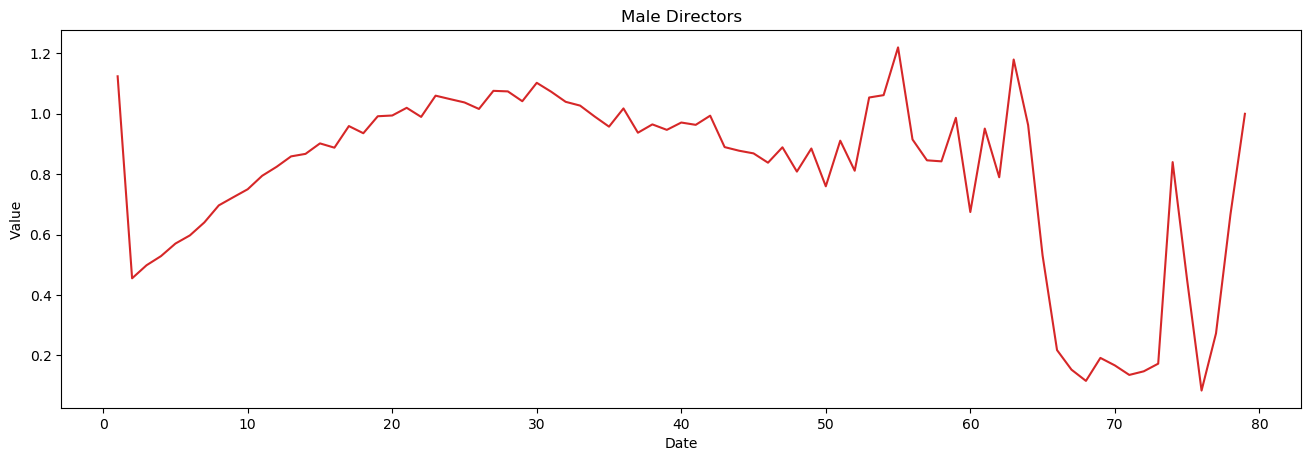

In [147]:
# Number of movies produced over the years by both the gender

careerYearMaleDF = pd.DataFrame({'Career_Year_Number':male_avg_movie_per_year.index,'Average':male_avg_movie_per_year.values})
careerYearMaleDF = careerYearMaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearMaleDF, x=careerYearMaleDF.Career_Year_Number, y=careerYearMaleDF.Average, title='Male Directors')

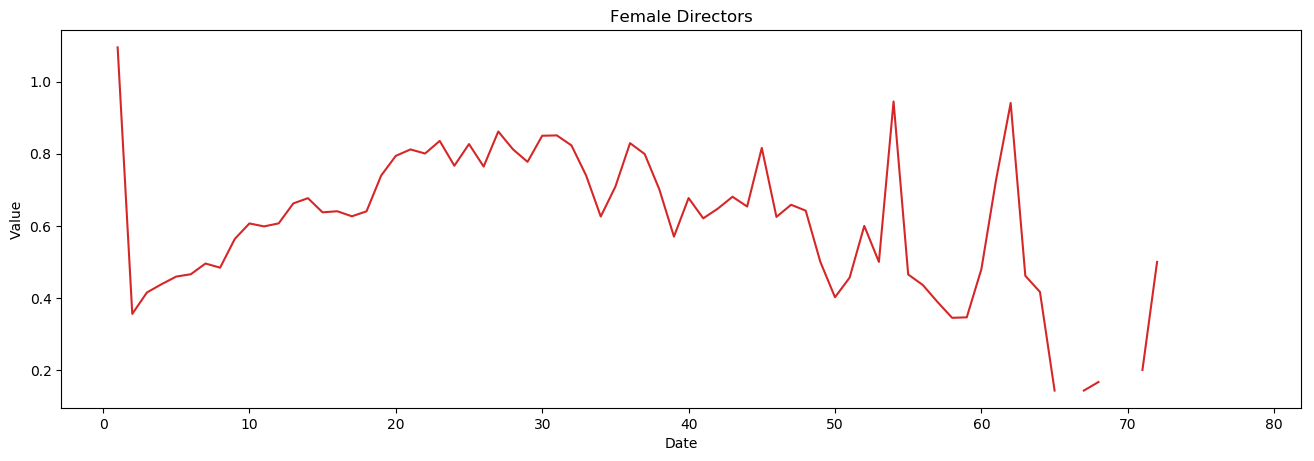

In [148]:
# Number of movies produced over the years by both the gender

careerYearFemaleDF = pd.DataFrame({'Career_Year_Number':female_avg_movie_per_year.index,'Average':female_avg_movie_per_year.values})
careerYearFemaleDF = careerYearFemaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearFemaleDF, x=careerYearFemaleDF.Career_Year_Number, y=careerYearFemaleDF.Average, title='Female Directors')

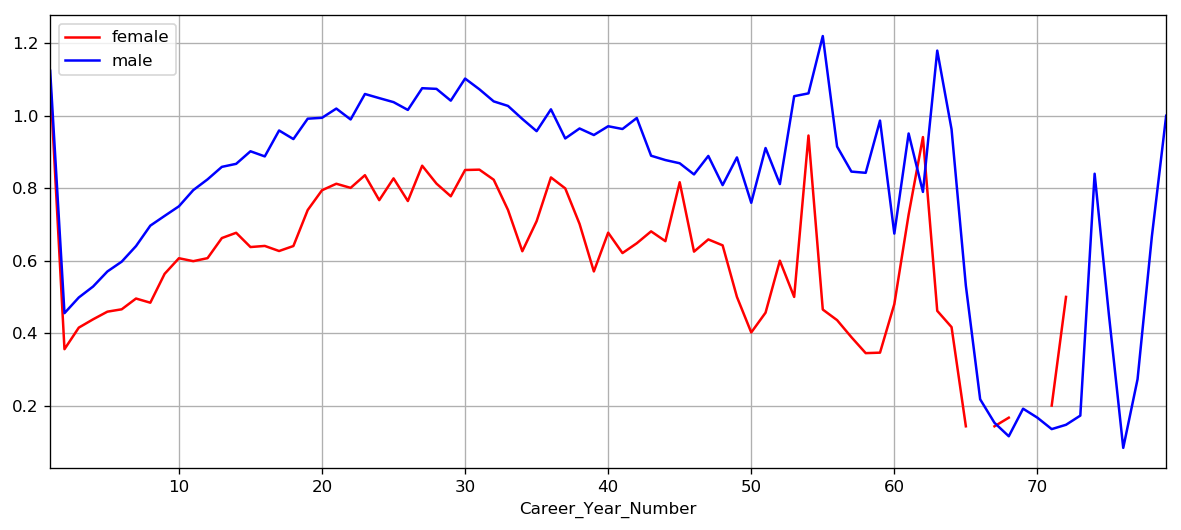

In [150]:
plt.figure(figsize=(12,5))
plt.xlabel('Etc')

ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1, l1, loc=2)
plt.show()